In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


1. caricare i dati in un dataframe

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/wtitze/4E/main/prime_titles.csv')


2. visualizzare i dati



In [ ]:
df

,S.no.,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
0,1,Pataal Lok,2020.0,1.0,Hindi,Drama,7.5,18+
1,2,Upload,2020.0,1.0,English,Sci-fi comedy,8.1,16+
2,3,The Marvelous Mrs. Maisel,2017.0,3.0,English,"Drama, Comedy",8.7,16+
3,4,Four More Shots Please,2019.0,2.0,Hindi,"Drama, Comedy",5.3,18+
4,5,Fleabag,2016.0,2.0,English,Comedy,8.7,18+
...,...,...,...,...,...,...,...,...
399,400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
400,401,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401,402,NaN,NaN,NaN,NaN,NaN,NaN,NaN
402,403,NaN,NaN,NaN,NaN,NaN,NaN,NaN


3. eliminare dal dataframe tutti i record con valori NaN


In [ ]:
df.dropna(inplace = True) 
df.count()

S.no.                      182
Name of the show           182
Year of release            182
No of seasons available    182
Language                   182
Genre                      182
IMDb rating                182
Age of viewers             182
dtype: int64

4. calcolare il numero di show per ogni lingua. Ordinare in ordine decrescente sul numero

In [ ]:
df1 = df.groupby("Language")["Name of the show"].count().sort_values(ascending = False)
df1

Language
English     155
Hindi        17
Japanese      7
Suomi         1
Spanish       1
Deutsch       1
Name: Name of the show, dtype: int64

5. visualizzare il grafico a barre verticali dei dati precedenti


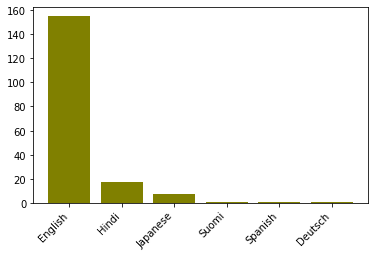

In [ ]:
data = df.groupby("Language")["Name of the show"].count().sort_values(ascending = False)
names = list(data.index)

fig = plt.figure()
ax = plt.axes()
ax.bar(names,data,color = "olive")
fig.autofmt_xdate(rotation=45)
plt.show()

6. visualizzare le stesse informazioni dell'esercizio precedente utilizzando un grafico a torta


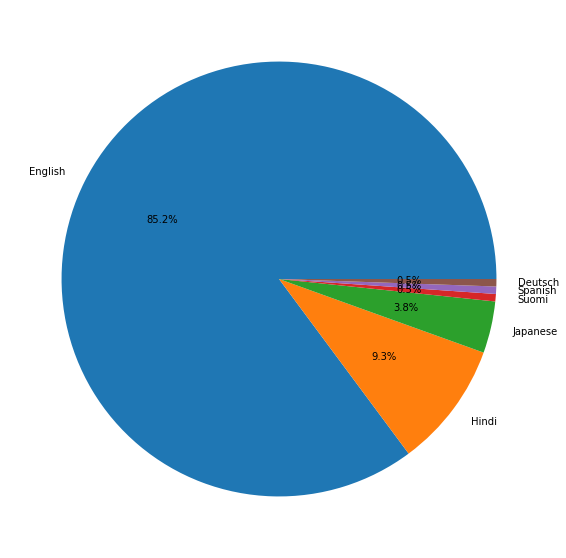

In [ ]:

fig = plt.figure(figsize=(10,10))
ax = plt.axes()
ax.pie(df1.values,labels=df1.index,autopct = "%1.1f%%")
plt.show()

7. creare un nuovo dataframe che nella colonna 'Language' contenga solo 'English' o 'non English'

In [ ]:
df3 = df.replace(df[df['Language']!='English']['Language'].tolist(),"non English")
df3

,S.no.,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
0,1,Pataal Lok,2020.0,1.0,non English,Drama,7.5,18+
1,2,Upload,2020.0,1.0,English,Sci-fi comedy,8.1,16+
2,3,The Marvelous Mrs. Maisel,2017.0,3.0,English,"Drama, Comedy",8.7,16+
3,4,Four More Shots Please,2019.0,2.0,non English,"Drama, Comedy",5.3,18+
4,5,Fleabag,2016.0,2.0,English,Comedy,8.7,18+
...,...,...,...,...,...,...,...,...
373,374,The Danny Thomas Show,1958.0,3.0,English,Comedy,7.2,All
374,375,Hitoshi Matsumoto Presents Documental,2018.0,3.0,non English,Comedy,8.0,18+
375,376,Businessmen VS Aliens,2018.0,1.0,non English,Comedy,4.5,13+
379,380,Scooter: Secret Agent,2003.0,1.0,English,Comedy,6.8,All


8. visualizzare un grafico a barre con gli anni sulle ascisse e il numero di show in inglese e non in inglese sulle ordinate. Considerare solo gli ultimi 10 anni (vedi grafico allegato come esempio)

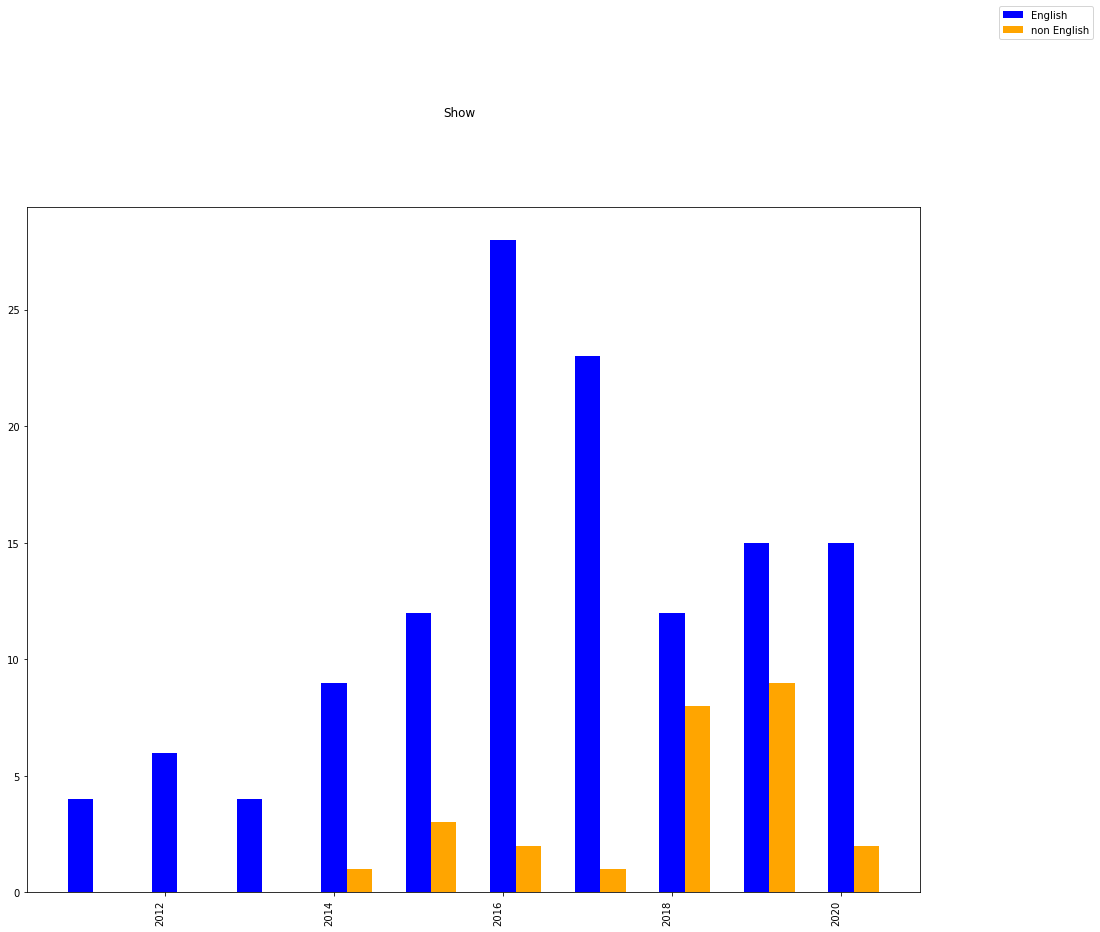

Language,English,non English
Year of release,,
2011.0,4.0,NaN
2012.0,6.0,NaN
2013.0,4.0,NaN
2014.0,9.0,1.0
2015.0,12.0,3.0
2016.0,28.0,2.0
2017.0,23.0,1.0
2018.0,12.0,8.0
2019.0,15.0,9.0


In [ ]:
df4 = df3.groupby(["Year of release", "Language"]).count().tail(17)["Name of the show"].unstack()
fig = plt.figure(figsize=(16,14)) 
ax = plt.axes()
ax.bar(df4.index,df4["English"],label="English",width=0.3,color="b")
ax.bar(df4.index+0.3,df4["non English"],label="non English",width=0.3,color="orange")
fig.autofmt_xdate(rotation=90)
fig.suptitle("Show")
ax.legend(bbox_to_anchor=(1.2, 1.3))
plt.show()
df4